Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 8</span>


In this exercise I wrote a code to find the expectation value of the ground state of the Hamiltonian:
$ \hat H = \hat T + V(x)$ with  $V(x) = x^4 - \frac{5}{2}x^2 $

To do so, two aspects were crucial:
- to sample the candidate wave function $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} $
 with a Metropolis algorithm, which sampled the positions $x$ with uniform steps (although the maximum step allowed was varied through the execution to adjust the acceptance rate).
- To explore the wave functions parameters space with a variational method, in this case simulated annealing. The update function for the annealing temperature that I used was exponential cooling (every 10 simulation steps to allow each temperature to be explored):
- $$T_{n+1} = r \times T_n$$
  where $r$ is the cooling rate.


Below I show a picture of $\langle {\hat H} \rangle_T$ as a function of the SA steps of the algorithm</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

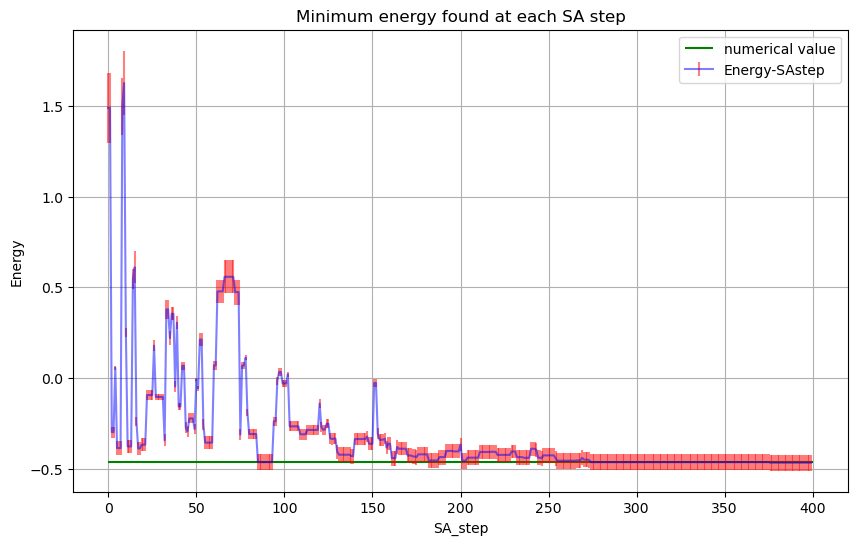

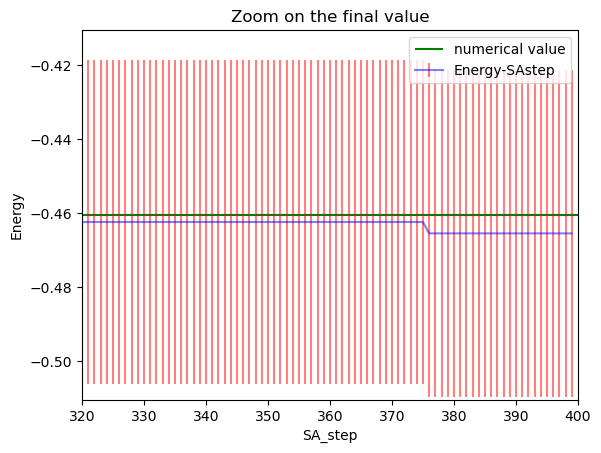

In [2]:
E_num = -0.460465879692715
# Load data
file_path = './OUTPUT/energy_history.csv'
data = pd.read_csv(file_path, nrows=400)

# Extract data from the DataFrame
step = data['SA_step']
energy = data['Energy']
err = data['Energy_Error']

# Plot the main plot
plt.figure(figsize=(10, 6))
plt.hlines(-0.460465879692715, 0, len(step), colors='g', label='numerical value')
plt.errorbar(step, energy, yerr=err, fmt='-', color='blue',ecolor='red', alpha=0.5, label='Energy-SAstep')
# Add labels and title
plt.xlabel('SA_step')
plt.ylabel('Energy')
plt.title('Minimum energy found at each SA step')
plt.legend()

# Show grid
plt.grid()

# Display the plot
plt.show()

# zoom on the final value
plt.hlines(E_num, 0, len(step), colors='g', label='numerical value')
plt.errorbar(step, energy, yerr=err, fmt='-', color='blue',ecolor='red', alpha=0.5, label='Energy-SAstep')
plt.xlabel('SA_step')
plt.ylabel('Energy')
plt.xlim(len(step)*0.8,len(step))
plt.ylim(E_num -0.05, E_num +0.05)
plt.title('Zoom on the final value')
plt.legend()
plt.show()


- To show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps, I showed how the individual parameters changed through the execution

Best Mu:  0.787932
Best Sigma:  0.627924


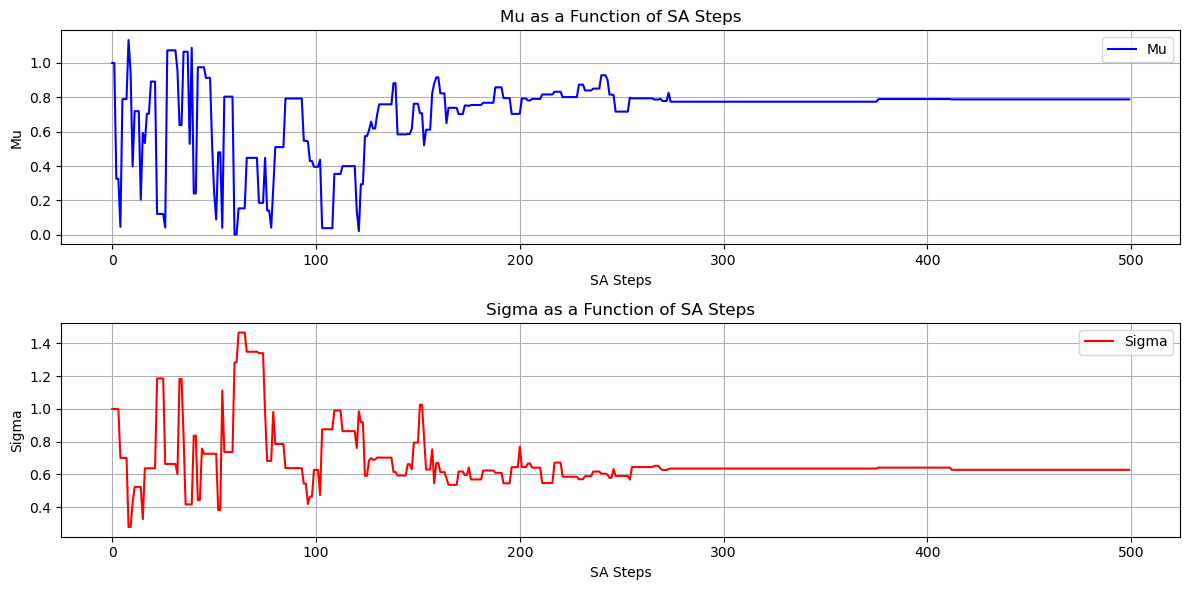

In [3]:
# Load the parameter trajectory data
traj_data = pd.read_csv('./OUTPUT/parameter_trajectory.csv', nrows=500)

# Extract SA steps, Mu, and Sigma
sa_steps = traj_data['SA_step']
mu_values = traj_data['Mu']
sigma_values = traj_data['Sigma']

# Print best values
print("Best Mu: ", mu_values[len(mu_values)-1])
print("Best Sigma: ", sigma_values[len(sigma_values)-1])
# Plot Mu and Sigma as a function of SA steps
plt.figure(figsize=(12, 6))

# Plot Mu
plt.subplot(2, 1, 1)
plt.plot(sa_steps, mu_values, 'b-', label='Mu')
plt.xlabel('SA Steps')
plt.ylabel('Mu')
plt.title('Mu as a Function of SA Steps')
plt.grid(True)
plt.legend()

# Plot Sigma
plt.subplot(2, 1, 2)
plt.plot(sa_steps, sigma_values, 'r-', label='Sigma')
plt.xlabel('SA Steps')
plt.ylabel('Sigma')
plt.title('Sigma as a Function of SA Steps')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


- Once the the set of parameters which minimize $\langle {\hat H} \rangle_T$</span> were found, I sampled the ground state with the metropolis alorithm. The following is a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks.

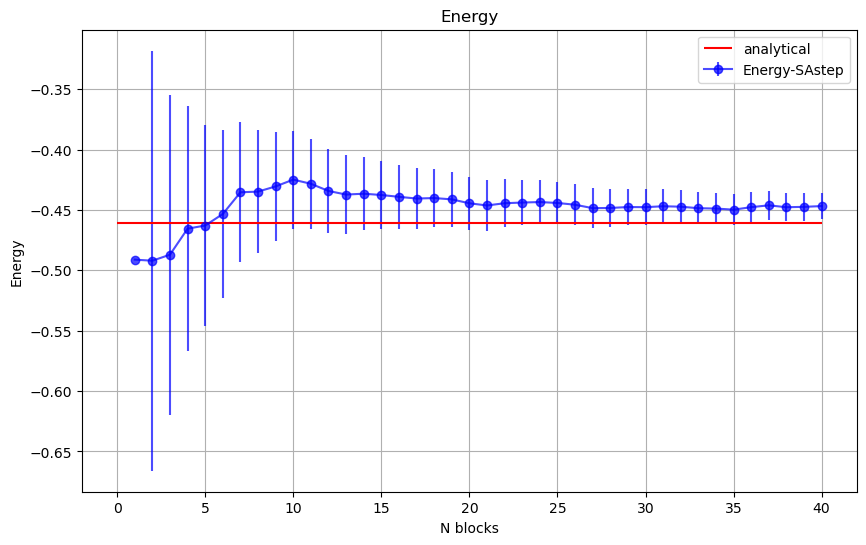

In [4]:

# Load data
file_path = './OUTPUT/final_energy_vs_blocks.csv'
data = pd.read_csv(file_path)

# Extract data from the DataFrame
block = data['Block']
energy = data['Average_Energy']
err = data['Energy_Error']

# Plot the main plot
plt.figure(figsize=(10, 6))
plt.errorbar(block, energy, yerr=err, fmt='o-', color='blue', alpha=0.7, label='Energy-SAstep')
plt.hlines(-0.460465879692715, 0, len(block), colors='r', label='analytical')

# Add labels and title
plt.xlabel('N blocks')
plt.ylabel('Energy')
plt.title('Energy')
plt.legend()

# Show grid
plt.grid()

- Finally I show a picture of the sampled $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, compared with the analytical curve and the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

Ground state energy:  -0.460465879692715


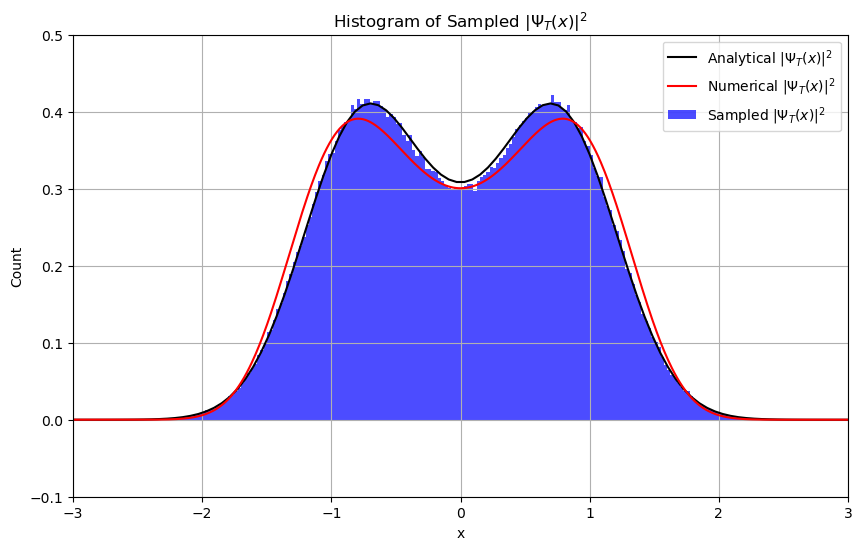

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the histogram data
file_path = './OUTPUT/psi_squared_histogram.csv'
data = pd.read_csv(file_path)

# Extract data from the DataFrame
x_bins = data['x_bin']
counts = data['Count']

total_samples = counts.sum()
bin_width = x_bins[1] - x_bins[0]
counts /= (total_samples*bin_width)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(x_bins, counts, width=(x_bins[1] - x_bins[0]), color='blue', alpha=0.7, label='Sampled $|\Psi_T(x)|^2$')


## ANALITICAL SOLUTION with the best parameters we could find on the market
def psi_2(x, _mu, _sigma):
    arg1 = 0.5*((_mu-x)/_sigma)**2
    arg2 = 0.5*((_mu+x)/_sigma)**2
    norm = 2*(1+np.exp(-(_mu/_sigma)**2))*_sigma*np.sqrt(np.pi)  ## looks complicated but it's just the sum of 3 gaussian integrals
    return (np.exp(-arg1)+ np.exp(-arg2))**2 / norm

Best_Mu= 0.787932
Best_Sigma=0.627924
x_an_plot = np.linspace(-3,3,100)
y_an_plot = psi_2(x_an_plot, Best_Mu, Best_Sigma)
plt.plot(x_an_plot, y_an_plot,color='black', label="Analytical $|\Psi_T(x)|^2$")



## NUMERICAL SOLUTION
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

# Plot a few things
plt.plot(x,(psi[0])**2, color='r', label='Numerical $|\Psi_T(x)|^2$')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram of Sampled $|\Psi_T(x)|^2$')
plt.legend()

# Show grid
plt.grid()
# Set axis limits for a better view
plt.xlim((-3,3))
plt.ylim(-0.1,0.5)
# Display the plot
plt.show()

Overall the simulated annealing algorithm seems to have found a solution that is very close to the one obtained with the numerical method, which raises cautious optimism on the correctness of the procedure.